In [106]:
# Import Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as split_data
import math


In [107]:
# Load Dataset
df = pd.read_csv('albrecht.csv')
df.shape

(24, 9)

In [108]:
df.head()

,id,Input,Output,Inquiry,File,FPAdj,RawFPcounts,AdjFP,Effort
0,1,25,150,75,60,1.00,1750.00,1750,102.4
1,2,193,98,70,36,1.00,1902.00,1902,105.2
2,3,70,27,0,12,0.80,535.00,428,11.1
3,4,40,60,20,12,1.15,660.00,759,21.1
4,5,10,69,1,9,0.90,478.89,431,28.8


In [109]:
data=df.drop(['id'],axis=1)
data.shape

(24, 8)

In [110]:
X=data.drop(['Effort'],axis=1)
y=data['Effort']
print(X)
print(y)

    Input  Output  Inquiry  File  FPAdj  RawFPcounts  AdjFP
0      25     150       75    60   1.00      1750.00   1750
1     193      98       70    36   1.00      1902.00   1902
2      70      27        0    12   0.80       535.00    428
3      40      60       20    12   1.15       660.00    759
4      10      69        1     9   0.90       478.89    431
5      13      19        0    23   0.75       377.33    283
6      34      14        0     5   0.80       256.25    205
7      17      17       15     5   1.10       262.73    289
8      45      64       14    16   0.95       715.79    680
9      40      60       20    15   1.15       690.43    794
10     41      27       29     5   1.10       465.45    512
11     33      17        8     5   0.75       298.67    224
12     28      41       16    11   0.85       490.59    417
13     43      40       20    35   0.85       802.35    682
14      7      12       13     8   0.95       220.00    209
15     28      38       24     9   1.05 

In [111]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16, 7), (16,), (8, 7), (8,))

<AxesSubplot:>

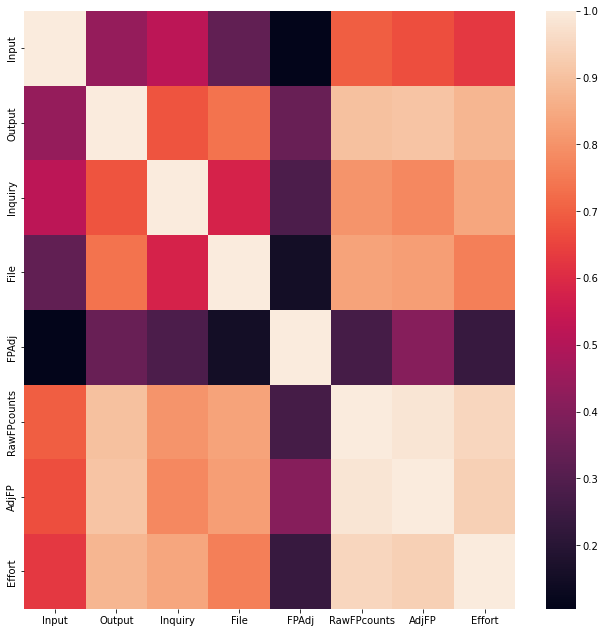

In [112]:
# Visualize Correlated Features
# corr = X_train.corr()
corr=data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

## Brute Force Method to find Correlated Features

In [113]:
from pandas.core.indexes.multi import names_compat
# Brute Force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    # for i in range(len(corr_mat.columns)):
    #     for j in range(i):
    #         if (abs(corr_mat.iloc[i,j]) > threshold):
    #             colname = corr_mat.columns[i]
    #             col_corr.add(colname)
    n=len(corr_mat.columns)
    # print(corr_mat)
    corr_features=set()
    features=[]
    for i in range(n-1):
        if(abs(corr_mat.iloc[i,n-1])>threshold):
            colname = corr_mat.columns[i]
            corr_features.add(colname)
            features.append(i)
    return corr_features,features

In [114]:
correlated_features,features = correlation(data=data, threshold=0.1)
print(len(set(correlated_features)))
print(correlated_features)
print(features)

7
{'FPAdj', 'Output', 'Input', 'File', 'Inquiry', 'RawFPcounts', 'AdjFP'}
[0, 1, 2, 3, 4, 5, 6]


In [115]:
x_data=X.iloc[:, features].values
y_data=y

# Linear Regression 
x_train, x_test, y_train, y_test = split_data( x_data, y_data, test_size = 1/4, shuffle=True) 
regressor = LinearRegression()
regressor = regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Root Mean Sqaured Error
MSE = np.square(np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error :",RMSE)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean()
print(f'MAE error is {error}')

Root Mean Squared Error : 0.5127811384915211
MAE error is 0.1863427459591541


In [116]:
# SVM
from sklearn.model_selection import train_test_split as split_data
X_train, X_test, Y_train, Y_test = split_data(x_data, y_data , test_size = 0.2 , shuffle=True)

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
svr=SVR() 
svr.fit(X_train,Y_train)
Y_pred=svr.predict(X_test)

#Root Mean Squared Error
MSE = np.square(np.subtract(Y_test,Y_pred)/np.maximum(np.absolute(Y_test),np.absolute(Y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(Y_test,Y_pred)/np.maximum(np.absolute(Y_test),np.absolute(Y_pred))).mean()
print(f'MAE error is {error}')

Root Mean Square Error:

0.4878459101598791
MAE error is 0.38348577950176194


In [120]:
# Random Forest
from sklearn.model_selection import train_test_split as split_data
x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size=0.20, shuffle=True)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
treeModel = DecisionTreeRegressor(max_depth=5, random_state=None)
treeModel.fit(x_train, y_train)
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=50, criterion="absolute_error")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean()
print(f'MAE error is {error}')

# Root Mean Squared Error
MSE = np.square(np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(RMSE)

MAE error is -0.23716834038696682
Root Mean Square Error:
0.37061193499291123
